In [1]:
from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = url, extract = True)

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.295.jpg', 'cat.19.jpg', 'cat.112.jpg', 'cat.497.jpg', 'cat.608.jpg', 'cat.155.jpg', 'cat.971.jpg', 'cat.671.jpg', 'cat.308.jpg', 'cat.968.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total_train = 2000
total_val = 1000

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [7]:
BATCH_SIZE = 150
IMG_SHAPE = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
val_image_generator = ImageDataGenerator(rescale = 1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(directory = train_dir, batch_size = BATCH_SIZE, shuffle = True, target_size =[IMG_SHAPE,IMG_SHAPE], class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = train_image_generator.flow_from_directory(directory = validation_dir, batch_size = BATCH_SIZE, shuffle = False, target_size =[IMG_SHAPE,IMG_SHAPE], class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plot(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()   

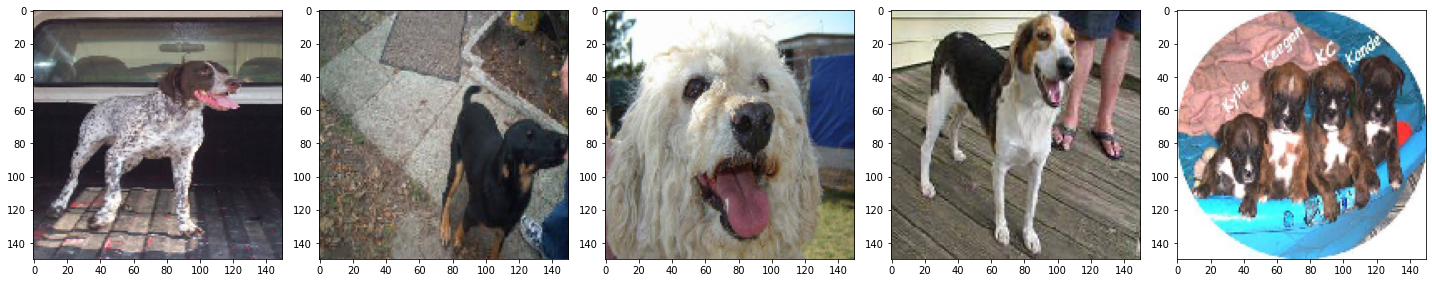

In [13]:
plot(sample_training_images[:5])

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')

])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [23]:
epochs = 10
history = model.fit_generator(train_data_gen, 
                              steps_per_epoch = int(np.ceil(total_train)/float(BATCH_SIZE)), 
                              epochs = epochs, 
                              validation_data = val_data_gen, 
                              validation_steps = int(np.ceil(total_val)/float(BATCH_SIZE)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
13/13 [==============================] - 9s 707ms/step - loss: 0.5366 - accuracy: 0.7243 - val_loss: 0.5932 - val_accuracy: 0.6811
Epoch 2/10
13/13 [==============================] - 8s 652ms/step - loss: 0.5174 - accuracy: 0.7438 - val_loss: 0.5598 - val_accuracy: 0.7189
Epoch 3/10
13/13 [==============================] - 8s 660ms/step - loss: 0.4910 - accuracy: 0.7643 - val_loss: 0.5665 - val_accuracy: 0.7211
Epoch 4/10
13/13 [==============================] - 8s 658ms/step - loss: 0.4580 - accuracy: 0.7827 - val_loss: 0.5746 - val_accuracy: 0.7144
Epoch 5/10
13/13 [==============================] - 9s 662ms/step - loss: 0.4215 - accuracy: 0.8103 - val_loss: 0.5585 - val_accuracy: 0.7378
Epoch 6/10
13/13 [==============================] - 8s 659ms/step - loss: 0.3544 - accuracy: 0.8427 - val_loss: 0.5594 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 8s 655ms/step - loss: 0.3236 - accuracy: 0.8573 - val_loss: 0.6152 - val_accuracy: 0.7433
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

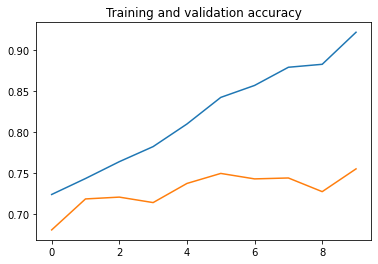

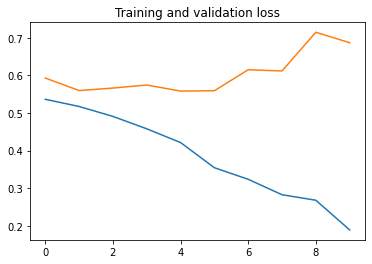

In [26]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')